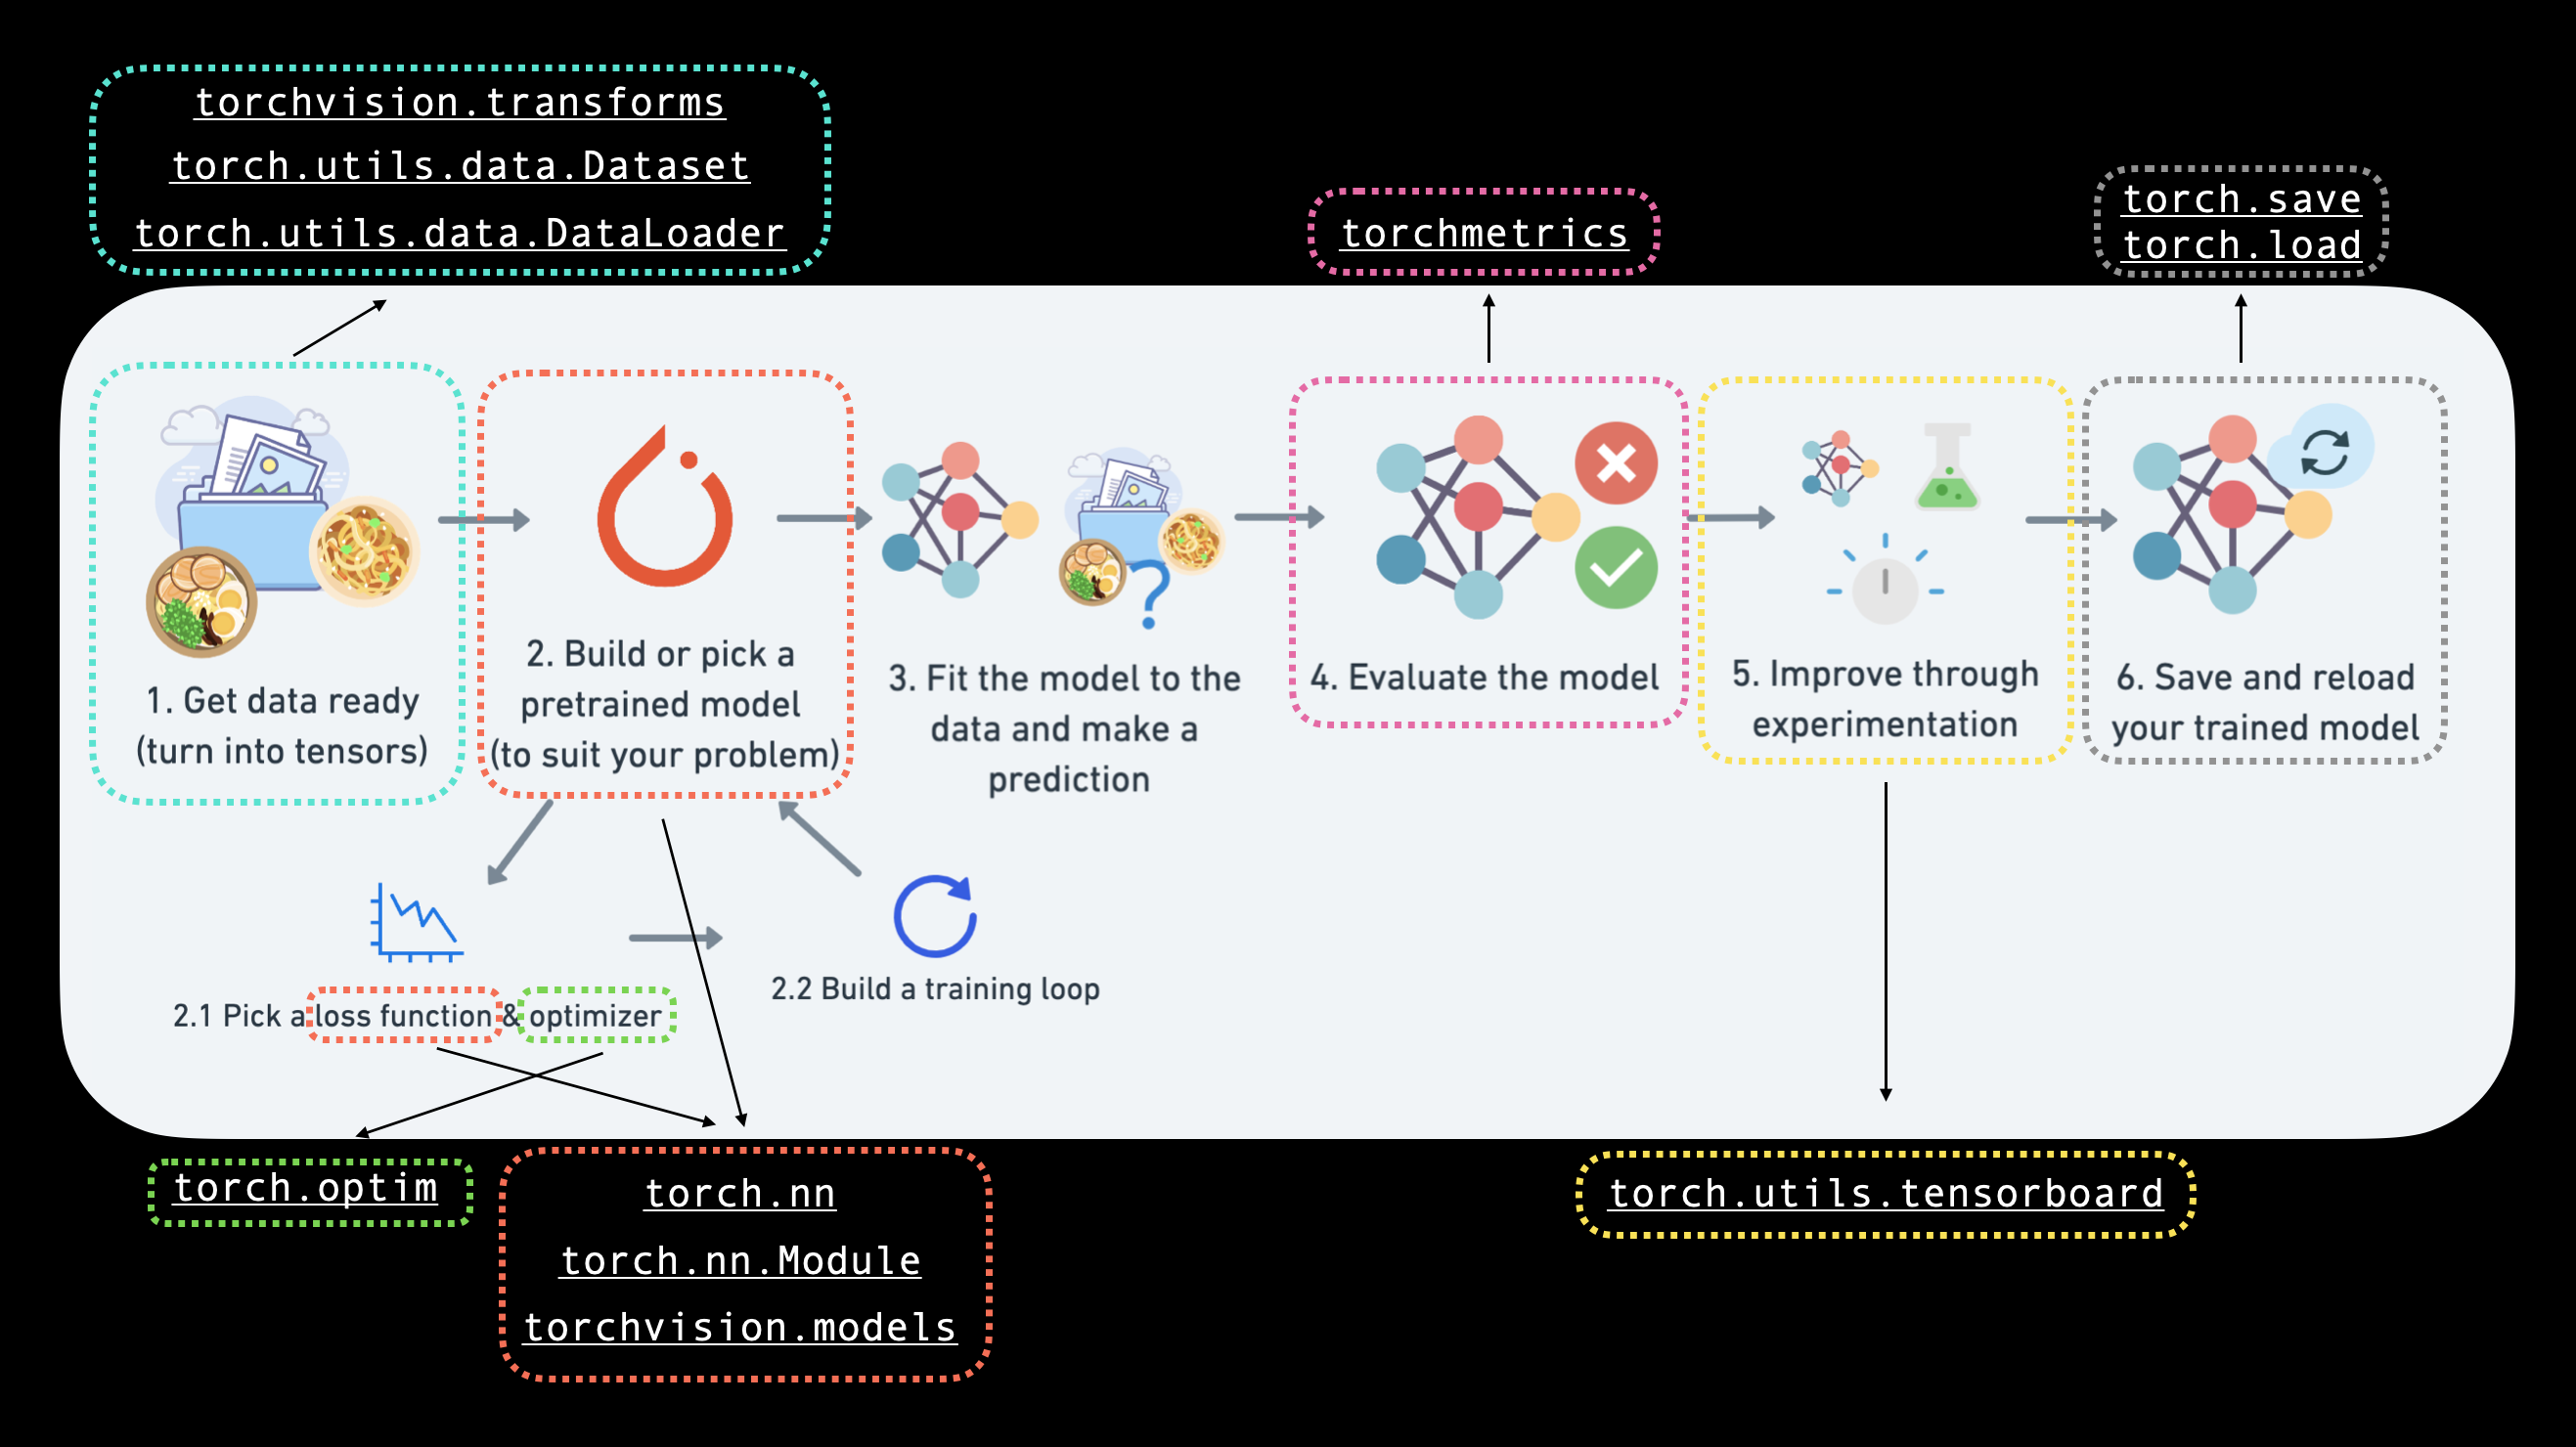

# PyTorch Computer Vision

https://www.learnpytorch.io/03_pytorch_computer_vision/

* CNN

`torchvision`

`torchvision.models`

`torchvision.datasets`
`torchvision.transforms`


In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.6.0+cu124
0.21.0+cu124


## Getting Dataset

FashionMNIST

In [2]:
# Training data
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.7MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 199kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.30MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 10.5MB/s]


In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# See the first training examples
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
print(f"Image Shape {image.shape} color channels, height, width\n")
print(f"image label {class_names[label]}")

Image Shape torch.Size([1, 28, 28]) color channels, height, width

image label Ankle boot


## Visualize our data

Image shape torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot')

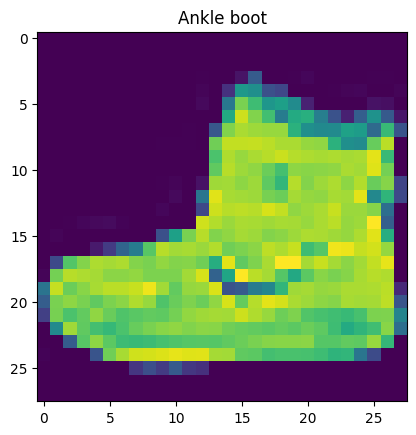

In [9]:
image, label = train_data[0]
print(f"Image shape {image.shape}")
plt.imshow(image.squeeze())
plt.title(class_names[label])

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

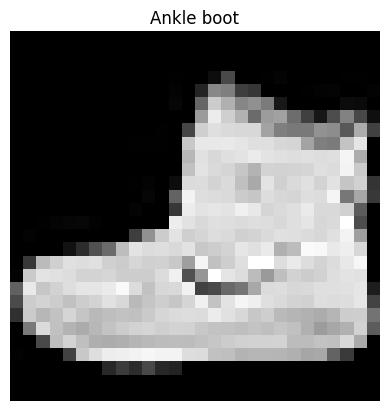

In [10]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

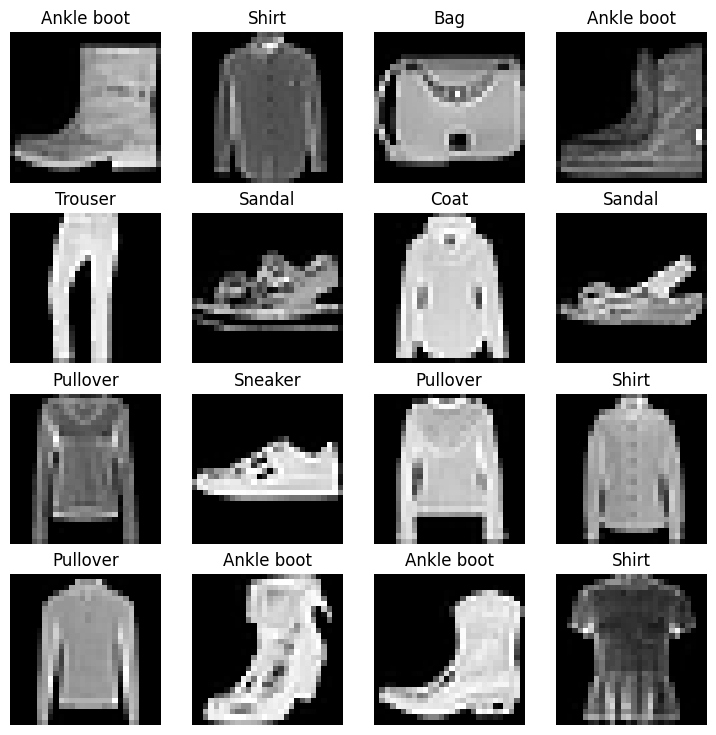

In [11]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
row, col = 4, 4
for i in range(1, row * col + 1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  # print(random_idx)
  image, label = train_data[random_idx]
  fig.add_subplot(row, col, i)
  plt.imshow(image.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

Non lineraity


## Prepare DataLoader
Data Loader turns our data into Python iterable

we want to turn our data into batches

1. Its is more computationally efficient
2. It gives our neural network more chance to update its gradient per epoch


In [12]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [13]:
# Turn train dataset into DataLoader
from torch.utils.data import DataLoader

# HyperParameter
BATCH_SIZE = 32

train_data_loader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_data_loader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

train_data_loader, test_data_loader

(<torch.utils.data.dataloader.DataLoader at 0x7ad1582b7b10>,
 <torch.utils.data.dataloader.DataLoader at 0x7ad158104090>)

In [14]:
# Lets check
print(f"Dataloaders: {train_data_loader, test_data_loader}")
print(f"Length of train dataloader: {len(train_data_loader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_data_loader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7ad1582b7b10>, <torch.utils.data.dataloader.DataLoader object at 0x7ad158104090>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [15]:
# Check out whats inside the training dataloaders
train_features_batch, train_labels_batch = next(iter(train_data_loader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size torch.Size([1, 28, 28])
Label: 8 | label size : torch.Size([])


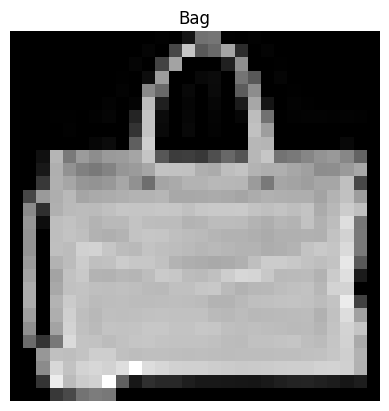

In [16]:
# Show a sample
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size {image.shape}")
print(f"Label: {label} | label size : {label.shape}")

## Build a baseline model

In [17]:
# Create a flatten layer
flatten_layer = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_layer(x)

print(f"shape before flattening : {x.shape}")
print(f"shape after flattening : {output.shape}")

shape before flattening : torch.Size([1, 28, 28])
shape after flattening : torch.Size([1, 784])


In [18]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [19]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784, # 28 * 28
    hidden_units=10,
    output_shape=len(class_names)
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [20]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [21]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

## Setup loss, optimizer and evaluation metrics
* Loss Function - `nn.CrossEntropyLoss`
* Optimizer - `nn.optim.SGD`
* Evaluation Metrics

In [22]:
import requests
from pathlib import Path

# Download helper functions from PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [23]:
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### Creating a function to time our experiments

ML is very experimental.


In [24]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device=None):
  """ prints difference b/w start amd end time"""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [25]:
start_time =timer()
end_time = timer()
print_train_time(start_time, end_time)

Train time on None: 0.000 seconds


5.831300001091222e-05

### Training looop and Testing loop on batches of data
1. Loop throung epochs
2. Loop through training batches, perform steps, calculate the train loos per batch.
3. Loop through testing batches, perform testing steps, claculate the test loss per batch.
4. Print out what's happening.
5. Time it all (for fun)

In [26]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# set seed and start timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# set no. of epochs
epochs = 3

# create training loop
for epoch in tqdm(range(epochs)):
  ### training
  train_loss = 0
  # Add a loop to lopp through the training batches
  for batch, (X, y) in enumerate(train_data_loader):
    model_0.train()
    # forward pass
    y_pred = model_0(X)

    # caclulate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss

    # optimizer zero grad
    optimizer.zero_grad()

    # loss backward
    loss.backward()

    # gradient descent
    optimizer.step()

    # print
    if batch % 400 == 0:
      print(f"Lokked at {batch * len(X)}/{len(train_data_loader.dataset)} samples")
  # Divide total train loss by length of train dataloader
  train_loss /= len(train_data_loader)

  ## testing
  test_loss, test_acc = 0, 0

  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_data_loader:
      test_pred = model_0(X_test)
      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    test_loss /= len(test_data_loader)
    test_acc /= len(test_data_loader)

  print(f"Train loss : {train_loss:.5f} | Test loss : {test_loss:.5f} | Test acc : {test_acc:.5f}")

# calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device="cpu")

  0%|          | 0/3 [00:00<?, ?it/s]

Lokked at 0/60000 samples
Lokked at 12800/60000 samples
Lokked at 25600/60000 samples
Lokked at 38400/60000 samples
Lokked at 51200/60000 samples
Train loss : 0.59039 | Test loss : 0.50954 | Test acc : 82.03874
Lokked at 0/60000 samples
Lokked at 12800/60000 samples
Lokked at 25600/60000 samples
Lokked at 38400/60000 samples
Lokked at 51200/60000 samples
Train loss : 0.47633 | Test loss : 0.47989 | Test acc : 83.19688
Lokked at 0/60000 samples
Lokked at 12800/60000 samples
Lokked at 25600/60000 samples
Lokked at 38400/60000 samples
Lokked at 51200/60000 samples
Train loss : 0.45503 | Test loss : 0.47664 | Test acc : 83.42652
Train time on cpu: 37.729 seconds


In [27]:
next(model_0.parameters()).device

device(type='cpu')

## Make predictions and get model 0 results


In [28]:
torch.manual_seed(42)
def eval_model(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    accuracy_fn,
    device: torch.device):
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # make data on target device
      X, y = X.to(device), y.to(device)

      # forward pass
      y_pred = model(X)

      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model acc": acc}


model_0_res = eval_model(model=model_0,
                          data_loader=test_data_loader,
                          loss_fn=loss_fn,
                          accuracy_fn=accuracy_fn,
                          device="cpu")
model_0_res

  0%|          | 0/313 [00:00<?, ?it/s]

{'model name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model acc': 83.42651757188499}

### Setup device agnostic-code

In [29]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [30]:
torch.cuda.is_available()

False

In [31]:
# setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## imporving the model or building better model with non-linearity


In [32]:
## model_1
class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x):
    return self.layer_stack(x)

In [33]:
# create an instance
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
next(model_1.parameters()).to(device)

Parameter containing:
tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
        [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
        [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
        ...,
        [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
        [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
        [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]],
       requires_grad=True)

In [34]:
from helper_functions import accuracy_fn
## loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                         lr=0.1)


In [35]:
## Create the  training functions
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """ Performs a training with model trying to learn on data_loader."""
  train_loss, train_acc = 0, 0

  # put model into training mode
  model.train()

  # Add a loop to lopp through the training batches
  for batch, (X, y) in enumerate(data_loader):
    # put data on target device
    X, y = X.to(device), y.to(device)

    # forward pass
    y_pred = model(X)

    # caclulate loss and acc
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    # optimizer zero grad
    optimizer.zero_grad()

    # loss backward
    loss.backward()

    # gradient descent
    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f"Train loss : {train_loss:.5f} | Train acc : {train_acc:.5f}")

In [36]:
## Create the testing functions
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """Performs a testing loop step on model going over data_loader"""
  test_loss, test_acc = 0, 0

  # put model to eval mode
  model.eval()

  # turn on inference mode
  with torch.inference_mode():
    for X, y in data_loader:
      # put data on target device
      X, y = X.to(device), y.to(device)

      # Froward pass
      test_pred = model(X)

      # caclulate loss and acc
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

  print(f"Test loss : {test_loss:.5f} | Test acc : {test_acc:.5f}")

In [37]:
# train and test the model_1
torch.manual_seed(42)

# training time
train_time_start_on_gpu = timer()
start_time = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
  # call train_step function for training
  train_step(model=model_1,
             data_loader=train_data_loader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  # call test_step function for testing
  test_step(model=model_1,
            data_loader=test_data_loader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

end_time = timer()
total_train_time_model_1 = print_train_time(start=start_time,
                                            end=end_time,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Train loss : 1.09199 | Train acc : 61.34333
Test loss : 0.95636 | Test acc : 64.99601
Train loss : 0.78101 | Train acc : 71.92833
Test loss : 0.72227 | Test acc : 73.91174
Train loss : 0.67027 | Train acc : 75.93667
Test loss : 0.68500 | Test acc : 75.01997
Train time on cpu: 44.987 seconds


In [38]:
model_1_res = eval_model(model=model_1,
                          data_loader=test_data_loader,
                          loss_fn=loss_fn,
                          accuracy_fn=accuracy_fn,
                         device=device)
model_1_res

  0%|          | 0/313 [00:00<?, ?it/s]

{'model name': 'FashionMNISTModelV1',
 'model_loss': 0.6850009560585022,
 'model acc': 75.01996805111821}

In [39]:
next(model_1.parameters()).to(device)

Parameter containing:
tensor([[ 0.0273,  0.0296, -0.0087,  ..., -0.0171,  0.0077,  0.0135],
        [-0.0190, -0.0359,  0.0193,  ...,  0.0192,  0.0259,  0.0185],
        [-0.0009,  0.0020,  0.0007,  ...,  0.0185, -0.0024,  0.0076],
        ...,
        [-0.0115,  0.0276, -0.0308,  ...,  0.0693,  0.0573,  0.0039],
        [-0.0231,  0.0255,  0.0238,  ..., -0.0829, -0.0392, -0.0057],
        [ 0.0179, -0.0148,  0.0052,  ..., -0.1301, -0.0557,  0.0184]],
       requires_grad=True)

# MODEL 2 :Building the CNN Model

CNN's are known as ConvNets.

CNN's are known for the capabilities to find the pattern in visual data.


Learn CNN : https://poloclub.github.io/cnn-explainer/


In [40]:
# Create a convolution neural network
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  model from CNN explainer website
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    return x

In [41]:
image.shape

torch.Size([1, 28, 28])

In [42]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

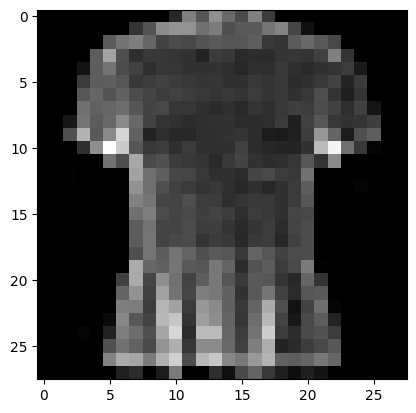

In [43]:
plt.imshow(image.squeeze(), cmap="gray")

In [44]:
random_image_tensor = torch.rand(size=(1, 28, 28))
random_image_tensor.shape

torch.Size([1, 28, 28])

In [45]:
model_2(random_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0372, -0.0748,  0.0573, -0.0396, -0.0098,  0.0194, -0.0003, -0.0114,
          0.0206,  0.0003]], grad_fn=<AddmmBackward0>)

### Stepping through `nn.Conv2d()`
see doc : https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

In [46]:
# model_2.state_dict()

In [47]:
torch.manual_seed(42)

# create a batch of images
images = torch.rand(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Shape of images : {images.shape}")
print(f"Shape of test_image : {test_image.shape}")
print(f"Test image:\n {test_image}")

Shape of images : torch.Size([32, 3, 64, 64])
Shape of test_image : torch.Size([3, 64, 64])
Test image:
 tensor([[[0.8823, 0.9150, 0.3829,  ..., 0.1587, 0.6542, 0.3278],
         [0.6532, 0.3958, 0.9147,  ..., 0.2083, 0.3289, 0.1054],
         [0.9192, 0.4008, 0.9302,  ..., 0.5535, 0.4117, 0.3510],
         ...,
         [0.1457, 0.1499, 0.3298,  ..., 0.9624, 0.6400, 0.7409],
         [0.1709, 0.5797, 0.6340,  ..., 0.6885, 0.2405, 0.5956],
         [0.9199, 0.1247, 0.3573,  ..., 0.6752, 0.2058, 0.5027]],

        [[0.1458, 0.9024, 0.9217,  ..., 0.1868, 0.6352, 0.8431],
         [0.9549, 0.4435, 0.6924,  ..., 0.1168, 0.7160, 0.5462],
         [0.1616, 0.1054, 0.8614,  ..., 0.4531, 0.4736, 0.9448],
         ...,
         [0.4309, 0.3986, 0.1907,  ..., 0.9444, 0.2848, 0.3776],
         [0.7948, 0.6855, 0.1009,  ..., 0.6147, 0.7747, 0.2323],
         [0.5840, 0.9795, 0.3277,  ..., 0.3549, 0.1263, 0.1280]],

        [[0.5027, 0.4195, 0.8893,  ..., 0.3084, 0.1567, 0.7860],
         [0.7310, 

In [48]:
test_image.shape

torch.Size([3, 64, 64])

In [49]:
torch.manual_seed(42)
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)

# pass the data
conv_output = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape of conv_output : {conv_output.shape}")

Shape of conv_output : torch.Size([1, 10, 62, 62])


### MaxPool2D

In [50]:
test_image.shape

torch.Size([3, 64, 64])

In [51]:
# print the original image shape without unsqueezed dim
print(f"Shape of test_image : {test_image.shape}")
print(f"Test image with unsqueeze:\n {test_image.unsqueeze(0).shape}")

# Create a sample nn.MaxPool2d
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# pass data through conv_layer
conv_output = conv_layer(test_image.unsqueeze(0))
print(f"Shape of conv_output : {conv_output.shape}")

# pass the data through max_pool_layer
max_pool_output = max_pool_layer(conv_output)
print(f"Shape of max_pool_output : {max_pool_output.shape}")

Shape of test_image : torch.Size([3, 64, 64])
Test image with unsqueeze:
 torch.Size([1, 3, 64, 64])
Shape of conv_output : torch.Size([1, 10, 62, 62])
Shape of max_pool_output : torch.Size([1, 10, 31, 31])


In [52]:
torch.manual_seed(42)
# create a random tensor with similar no. of dim to our image
random_tensor = torch.rand(size=(1, 1, 2, 2))
print(f"Shape of random_tensor : {random_tensor.shape}")
print(f"Random tensor:\n {random_tensor}")

# create a maxpool
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# pass data through max_pool_layer
max_pool_output = max_pool_layer(random_tensor)

print(f"Shape of random_tensor : {random_tensor.shape}")
print(f"Shape of max_pool_output : {max_pool_output.shape}")
print(f"max_pool_output:\n {max_pool_output}")

Shape of random_tensor : torch.Size([1, 1, 2, 2])
Random tensor:
 tensor([[[[0.8823, 0.9150],
          [0.3829, 0.9593]]]])
Shape of random_tensor : torch.Size([1, 1, 2, 2])
Shape of max_pool_output : torch.Size([1, 1, 1, 1])
max_pool_output:
 tensor([[[[0.9593]]]])


### Setup loss function and the optimizer


In [53]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [54]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

### training loops and testing loop

In [55]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# measure time
train_time_start_on_gpu = timer()
start_time = timer()

# train and test model
epoch = 3
for epoch in tqdm(range(epoch)):
  print(f"Epoch : {epoch}\n---------")
  train_step(model=model_2,
             data_loader=train_data_loader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_2,
            data_loader=test_data_loader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

end_time = timer()
total_train_time_model_2 = print_train_time(start=start_time,
                                            end=end_time,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
---------
Train loss : 0.59518 | Train acc : 78.37500
Test loss : 0.39500 | Test acc : 85.99241
Epoch : 1
---------
Train loss : 0.36536 | Train acc : 86.90167
Test loss : 0.35244 | Test acc : 86.91094
Epoch : 2
---------
Train loss : 0.32588 | Train acc : 88.12833
Test loss : 0.32719 | Test acc : 88.06909
Train time on cpu: 225.366 seconds


In [56]:
# Get model_2 results
model_2_res = eval_model(model=model_2,
                         data_loader=test_data_loader,
                         loss_fn=loss_fn,
                         accuracy_fn=accuracy_fn,
                         device=device)
model_2_res

  0%|          | 0/313 [00:00<?, ?it/s]

{'model name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model acc': 88.06908945686901}

In [57]:
model_0_res

{'model name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model acc': 83.42651757188499}

In [58]:
model_1_res

{'model name': 'FashionMNISTModelV1',
 'model_loss': 0.6850009560585022,
 'model acc': 75.01996805111821}

## compare model results

In [59]:
import pandas as pd

compare_res = pd.DataFrame(data=[model_0_res, model_1_res, model_2_res])
compare_res

,model name,model_loss,model acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.327190,88.069089


In [60]:
# add training time to result comparison
compare_res["Training time"] = [f"{total_train_time_model_0:.3f}",
                                f"{total_train_time_model_1:.3f}",
                                f"{total_train_time_model_2:.3f}"]

compare_res

,model name,model_loss,model acc,Training time
0,FashionMNISTModelV0,0.476639,83.426518,37.729
1,FashionMNISTModelV1,0.685001,75.019968,44.987
2,FashionMNISTModelV2,0.327190,88.069089,225.366


Text(0, 0.5, 'Model')

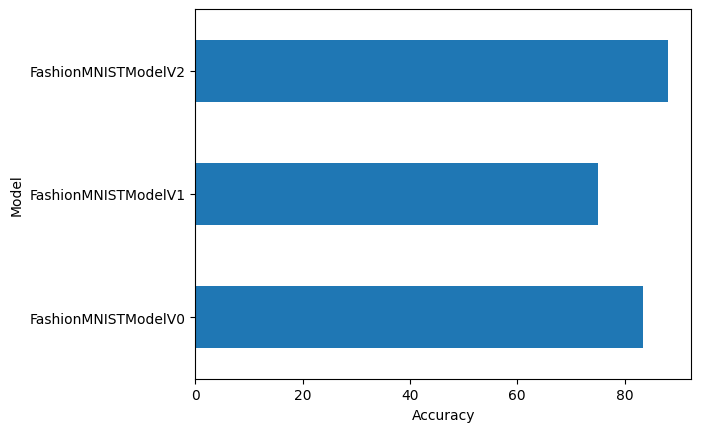

In [61]:
# Visualize our model results
import matplotlib.pyplot as plt
compare_res.set_index("model name")["model acc"].plot(kind="barh")
plt.xlabel("Accuracy")
plt.ylabel("Model")

## make and evaluate random prediction with best model

In [62]:
def make_prediction(model:torch.nn.Module,
                    data: list,
                    device: torch.device = device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      image = sample.unsqueeze(dim=0).to(device)
      # forward pass
      pred_logit = model(image)
      # get prediction probability
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
      # get pred_prob off the GPU
      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)

In [63]:
img, label = test_data[0][:10]
img.shape, label

(torch.Size([1, 28, 28]), 9)

In [64]:
import random
# random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# view the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Ankle boot')

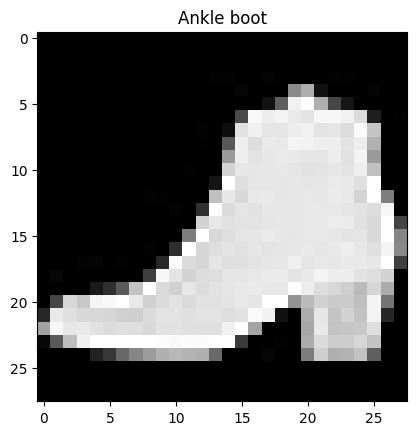

In [65]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [66]:
# make predictions
pred_probs = make_prediction(model=model_2,
                             data=test_samples)

# view first 2 prediction probs
pred_probs[:2]

tensor([[1.1659e-06, 1.0102e-07, 1.2332e-06, 2.3028e-06, 3.2110e-07, 2.2353e-04,
         4.0540e-06, 7.2005e-04, 7.3280e-05, 9.9897e-01],
        [2.6826e-06, 3.8631e-06, 1.3667e-05, 8.2061e-06, 5.2742e-06, 3.3047e-03,
         2.1650e-06, 9.9624e-01, 2.4600e-04, 1.7310e-04]])

In [67]:
# convert pred_prob tolabels
pred_labels = torch.argmax(input=pred_probs, dim=1)
pred_labels

tensor([9, 7, 7, 6, 5, 2, 6, 6, 5])

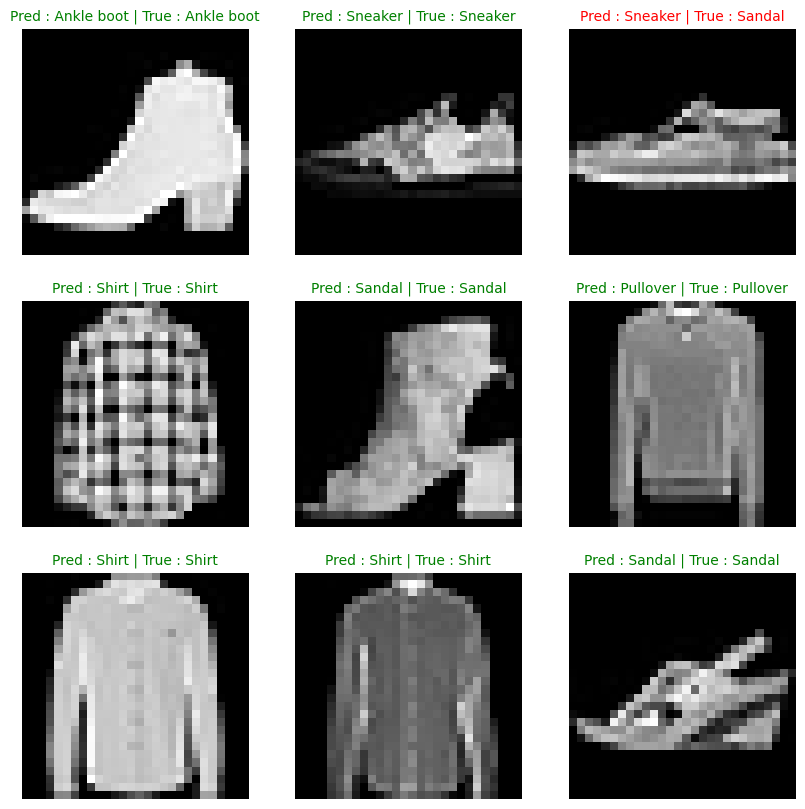

In [68]:
# plot predictions
plt.figure(figsize=(10, 10))
for i, sample in enumerate(test_samples):
  plt.subplot(3, 3, i+1)
  plt.imshow(sample.squeeze(), cmap="gray")
  pred_label = class_names[pred_labels[i]]
  true_label = class_names[test_labels[i]]
  title_text = f"Pred : {pred_label} | True : {true_label}"

  if pred_label == true_label:
    plt.title(title_text, fontsize=10, color="green")
  else:
    plt.title(title_text, fontsize=10, color="red")
  plt.axis(False)


## Making a Confusion matrix
https://pytorch.org/ignite/generated/ignite.metrics.confusion_matrix.ConfusionMatrix.html

1. Make prediction with our trained model on the test dataset
2. Make a confusion matrix `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`

In [69]:
from tqdm.auto import tqdm

# make predictions
y_pred = []
y_true = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_data_loader, desc="Making predictions...."):
    X, y = X.to(device), y.to(device)
    y_logits = model_2(X)
    y_pred.extend(y_logits.argmax(dim=1).tolist())
    y_true.extend(y.tolist())

y_pred_tensor = torch.tensor(y_pred)
y_true_tensor = torch.tensor(y_true)
print(f"{y_pred_tensor[:10]}")
print(f"{y_true_tensor[:10]}")

Making predictions....:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])
tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])


In [70]:
try:
  import torchmetrics, mlxtend
  print("torchmetrics and mlxtend are already installed")
  print(f"torchmetrics version : {torchmetrics.__version__}")
  print(f"mlxtend version : {mlxtend.__version__}")
  assert mlxtend.__version__ == "0.19.0"
except:
  print("torchmetrics and mlxtend are not installed")
  print("Installing torchmetrics and mlxtend....")
  !pip install torchmetrics mlxtend --quiet
  print("Installed torchmetrics and mlxtend")
  import torchmetrics, mlxtend
  print(f"torchmetrics version : {torchmetrics.__version__}")
  print(f"mlxtend version : {mlxtend.__version__}")

torchmetrics and mlxtend are not installed
Installing torchmetrics and mlxtend....
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.5 MB/s eta 0:00:00
Installed torchmetrics and mlxtend
torc

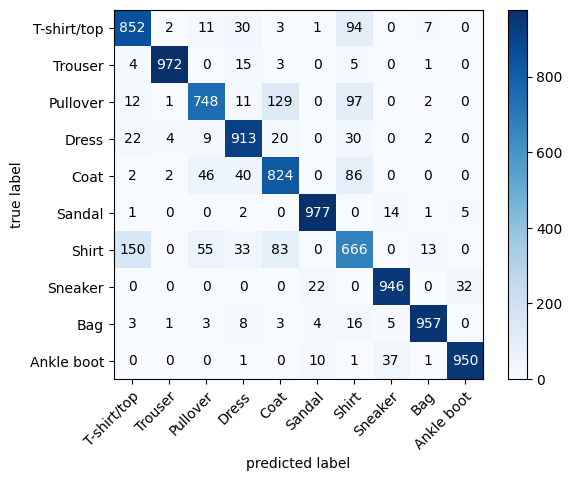

In [71]:
import mlxtend
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup
cm = ConfusionMatrix(num_classes=len(class_names), task="multiclass")

# Calculate
cm_tensor = cm(preds=y_pred_tensor, target=y_true_tensor)

# Plot
fig, ax = plot_confusion_matrix(conf_mat=cm_tensor.numpy(),
                                show_normed=False,
                                cmap=plt.cm.Blues,
                                colorbar=True,
                                class_names=class_names)

## Save and Load model

In [72]:
# saving model
torch.save(obj=model_2.state_dict(),
           f="fashion_mnist_model_2.pth")

In [73]:
# load model
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                   hidden_units=10,
                                   output_shape=len(class_names)).to(device)
# load
loaded_model_2.load_state_dict(torch.load("fashion_mnist_model_2.pth"))

# device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [74]:
model_2_res

{'model name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model acc': 88.06908945686901}

In [75]:
# evaluate loaded model
torch.manual_seed(42)

loaded_model_2_res = eval_model(model=loaded_model_2,
                                data_loader=test_data_loader,
                                loss_fn=loss_fn,
                                accuracy_fn=accuracy_fn,
                                device=device)
loaded_model_2_res

  0%|          | 0/313 [00:00<?, ?it/s]

{'model name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model acc': 88.06908945686901}

In [76]:
model_2_res == loaded_model_2_res

True